In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Random_state=np.random.seed(42)

In [3]:
df=pd.read_csv(r"C:\Users\admin\Desktop\house-prices-advanced-regression-techniques\HousePrice_train.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

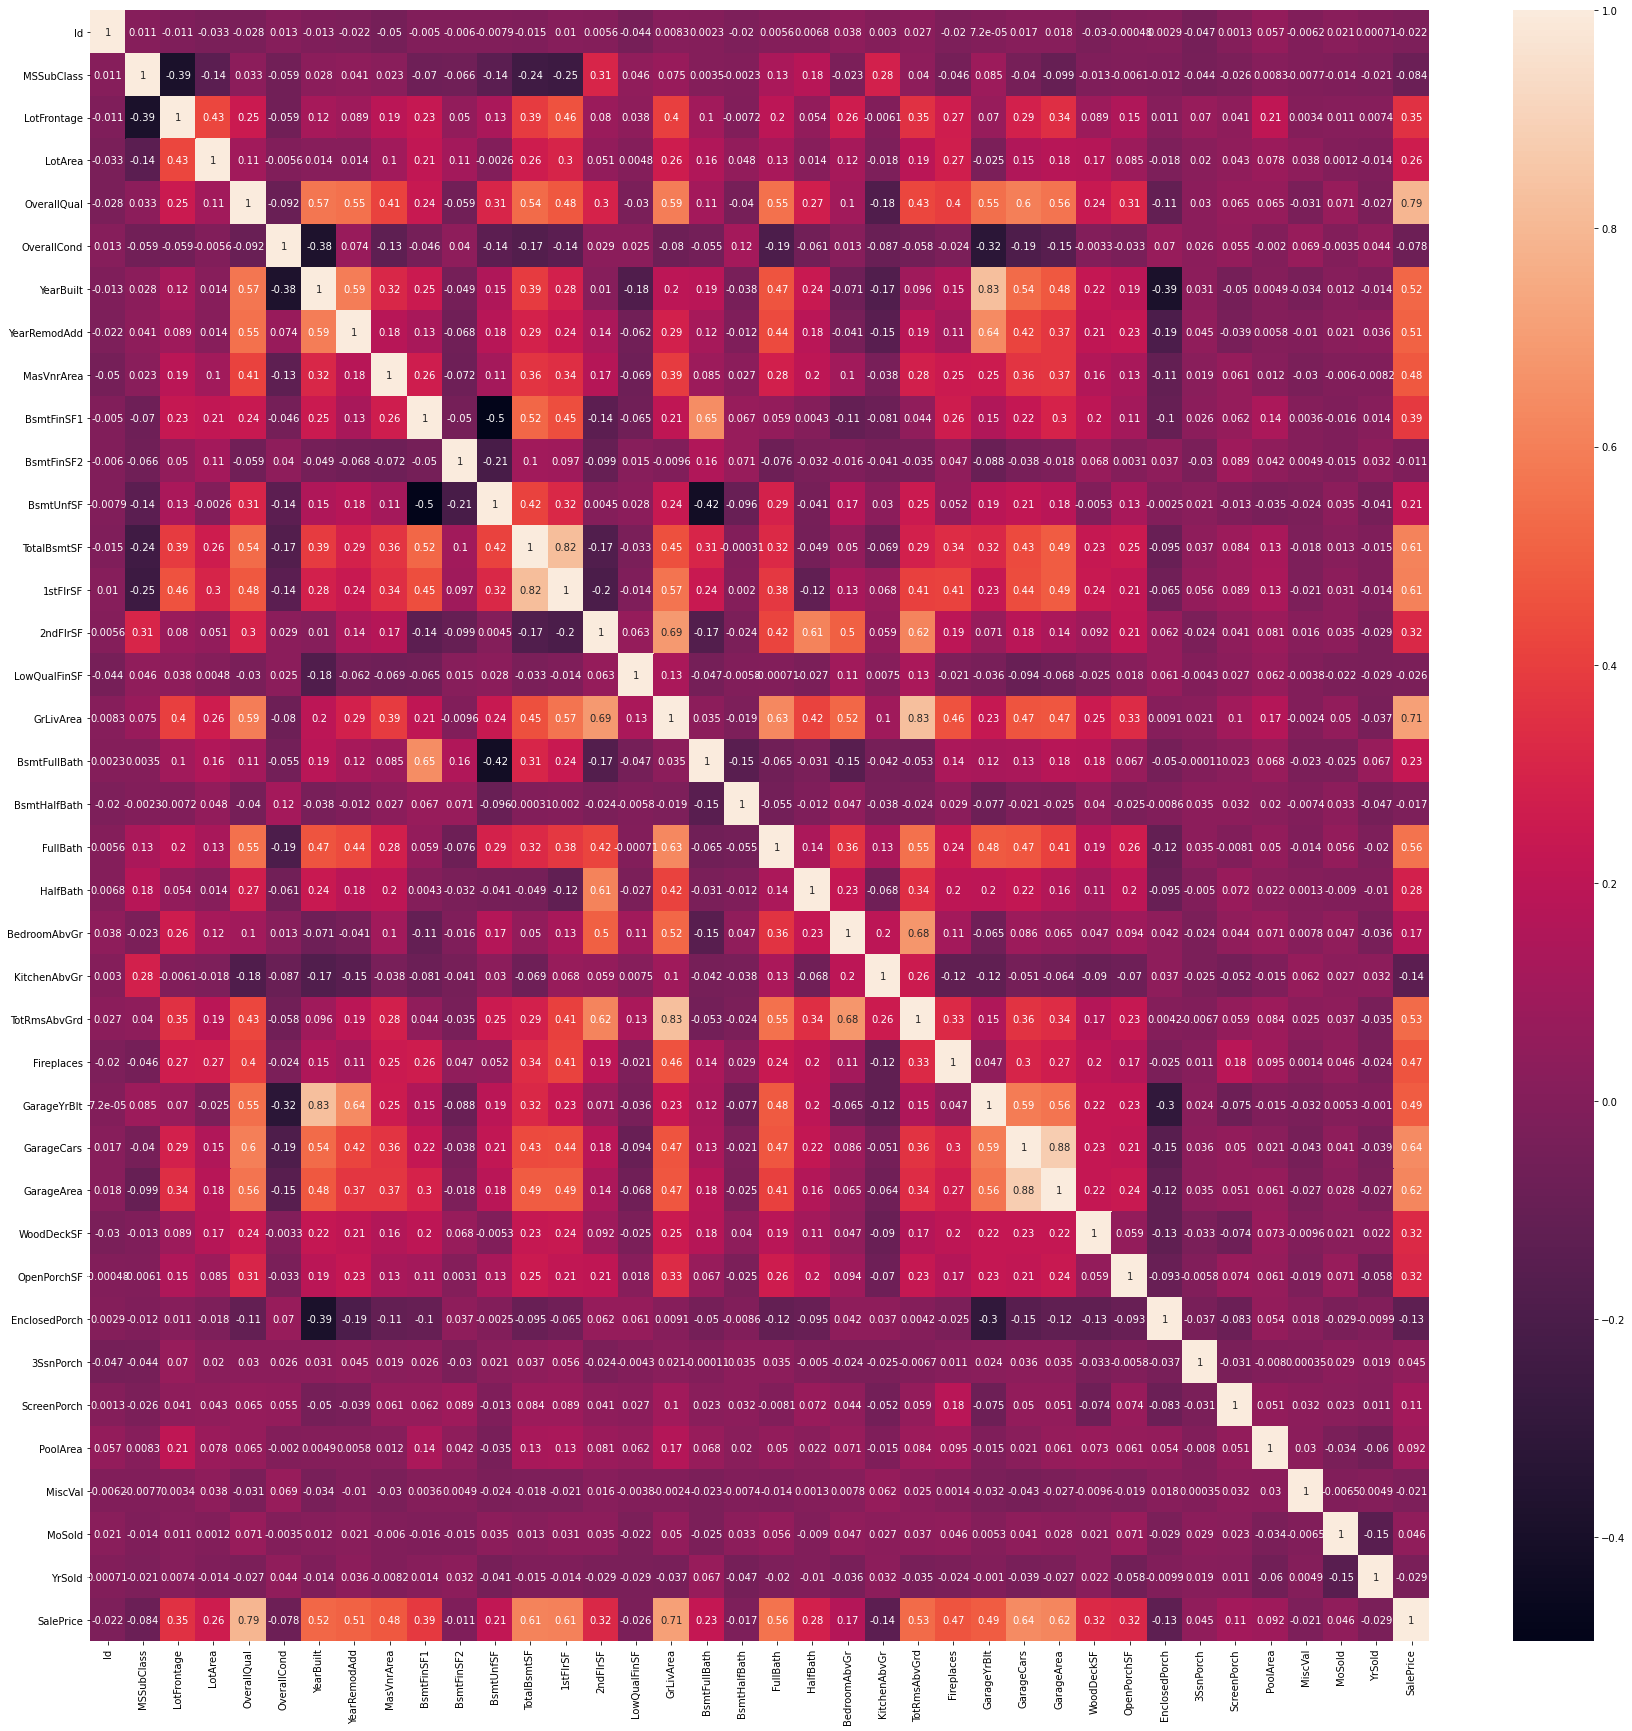

In [8]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [9]:
### Checking whether any duplicate rows are present.
df.duplicated().sum()

0

In [10]:
### Finding % of Null values fr each column.
for i in df.columns:
    print(i)
    print("NaN values:",df[i].isna().sum())
    print("NaN Count:",df[i].isna().sum()/df.shape[0]*100)
    print()
    

Id
NaN values: 0
NaN Count: 0.0

MSSubClass
NaN values: 0
NaN Count: 0.0

MSZoning
NaN values: 0
NaN Count: 0.0

LotFrontage
NaN values: 259
NaN Count: 17.73972602739726

LotArea
NaN values: 0
NaN Count: 0.0

Street
NaN values: 0
NaN Count: 0.0

Alley
NaN values: 1369
NaN Count: 93.76712328767123

LotShape
NaN values: 0
NaN Count: 0.0

LandContour
NaN values: 0
NaN Count: 0.0

Utilities
NaN values: 0
NaN Count: 0.0

LotConfig
NaN values: 0
NaN Count: 0.0

LandSlope
NaN values: 0
NaN Count: 0.0

Neighborhood
NaN values: 0
NaN Count: 0.0

Condition1
NaN values: 0
NaN Count: 0.0

Condition2
NaN values: 0
NaN Count: 0.0

BldgType
NaN values: 0
NaN Count: 0.0

HouseStyle
NaN values: 0
NaN Count: 0.0

OverallQual
NaN values: 0
NaN Count: 0.0

OverallCond
NaN values: 0
NaN Count: 0.0

YearBuilt
NaN values: 0
NaN Count: 0.0

YearRemodAdd
NaN values: 0
NaN Count: 0.0

RoofStyle
NaN values: 0
NaN Count: 0.0

RoofMatl
NaN values: 0
NaN Count: 0.0

Exterior1st
NaN values: 0
NaN Count: 0.0

Exterio

In [11]:
df.LotFrontage.fillna(df.LotFrontage.median(),inplace=True)

df.drop(['Alley'],axis=1,inplace=True)
df.drop(['MasVnrType'],axis=1,inplace=True)
df.drop(['MasVnrArea'],axis=1,inplace=True)


In [12]:
df.BsmtQual.fillna(df.BsmtQual.mode().values[0],inplace=True)

df.BsmtCond.fillna(df.BsmtCond.mode().values[0],inplace=True)

df.BsmtExposure.fillna(df.BsmtExposure.mode().values[0],inplace=True)

df.BsmtFinType1.fillna(df.BsmtFinType1.mode().values[0],inplace=True)

df.BsmtFinType2.fillna(df.BsmtFinType2.mode().values[0],inplace=True)

df.Electrical.fillna(df.Electrical.mode().values[0],inplace=True)

df.FireplaceQu.fillna(df.FireplaceQu.mode().values[0],inplace=True)

df.GarageType.fillna(df.GarageType.mode().values[0],inplace=True)

df.dropna(axis=0,subset=['GarageYrBlt'],inplace=True)

df.GarageFinish.fillna(df.GarageFinish.mode().values[0],inplace=True)

df.GarageQual.fillna(df.GarageQual.mode().values[0],inplace=True)

df.GarageCond.fillna(df.GarageCond.mode().values[0],inplace=True)

df.drop(['PoolQC'],axis=1,inplace=True)

df.drop(['Fence'],axis=1,inplace=True)

df.drop(['MiscFeature'],axis=1,inplace=True)

df.drop(['Id'],axis=1,inplace=True)

In [13]:
for i in df.columns:
    print(i)
    print("NaN values:",df[i].isna().sum())
    print("NaN Count:",df[i].isna().sum()/df.shape[0]*100)
    print()


MSSubClass
NaN values: 0
NaN Count: 0.0

MSZoning
NaN values: 0
NaN Count: 0.0

LotFrontage
NaN values: 0
NaN Count: 0.0

LotArea
NaN values: 0
NaN Count: 0.0

Street
NaN values: 0
NaN Count: 0.0

LotShape
NaN values: 0
NaN Count: 0.0

LandContour
NaN values: 0
NaN Count: 0.0

Utilities
NaN values: 0
NaN Count: 0.0

LotConfig
NaN values: 0
NaN Count: 0.0

LandSlope
NaN values: 0
NaN Count: 0.0

Neighborhood
NaN values: 0
NaN Count: 0.0

Condition1
NaN values: 0
NaN Count: 0.0

Condition2
NaN values: 0
NaN Count: 0.0

BldgType
NaN values: 0
NaN Count: 0.0

HouseStyle
NaN values: 0
NaN Count: 0.0

OverallQual
NaN values: 0
NaN Count: 0.0

OverallCond
NaN values: 0
NaN Count: 0.0

YearBuilt
NaN values: 0
NaN Count: 0.0

YearRemodAdd
NaN values: 0
NaN Count: 0.0

RoofStyle
NaN values: 0
NaN Count: 0.0

RoofMatl
NaN values: 0
NaN Count: 0.0

Exterior1st
NaN values: 0
NaN Count: 0.0

Exterior2nd
NaN values: 0
NaN Count: 0.0

ExterQual
NaN values: 0
NaN Count: 0.0

ExterCond
NaN values: 0
NaN

In [14]:
### Retriving the column names whose datatype is 'object'.
object_dtype_columns = list(df.select_dtypes(['O']))
print((object_dtype_columns))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [15]:
### Checking the number of unique values present in each object type columns.  

a=[]
for i in object_dtype_columns:
    print(i)
    print("Unique Values= ",len(df[i].unique()))
    a.append(len(df[i].unique()))
    print()
print(sum(a))

MSZoning
Unique Values=  5

Street
Unique Values=  2

LotShape
Unique Values=  4

LandContour
Unique Values=  4

Utilities
Unique Values=  2

LotConfig
Unique Values=  5

LandSlope
Unique Values=  3

Neighborhood
Unique Values=  25

Condition1
Unique Values=  9

Condition2
Unique Values=  8

BldgType
Unique Values=  5

HouseStyle
Unique Values=  8

RoofStyle
Unique Values=  6

RoofMatl
Unique Values=  8

Exterior1st
Unique Values=  14

Exterior2nd
Unique Values=  16

ExterQual
Unique Values=  4

ExterCond
Unique Values=  4

Foundation
Unique Values=  6

BsmtQual
Unique Values=  4

BsmtCond
Unique Values=  4

BsmtExposure
Unique Values=  4

BsmtFinType1
Unique Values=  6

BsmtFinType2
Unique Values=  6

Heating
Unique Values=  6

HeatingQC
Unique Values=  5

CentralAir
Unique Values=  2

Electrical
Unique Values=  5

KitchenQual
Unique Values=  4

Functional
Unique Values=  7

FireplaceQu
Unique Values=  5

GarageType
Unique Values=  6

GarageFinish
Unique Values=  3

GarageQual
Unique 

In [16]:
### Defining One Hot Encoding.

def One_hot_encoding(df,datacolumn):
    a=pd.get_dummies(data=df[datacolumn],prefix=datacolumn)
    df=pd.concat([df,a],axis=1)
    df=df.drop(datacolumn,axis=1)
    return df

In [17]:
### Defining Mean Encoding.
def Mean_encoding(df,datacolumn,target):
    mean_encoding=df.groupby(datacolumn)[target].mean().to_dict()
    df['mean_encode '+datacolumn]=df[datacolumn].map(mean_encoding)
    df=df.drop(datacolumn,axis=1)
    return df

In [18]:
# mean_ordinal=df.groupby(['MSZoning'])['SalePrice'].mean().to_dict()
# df1['mean_ordinal_encode'+' MSZoning']=df['MSZoning'].map(mean_ordinal)
# df1.head()

In [19]:
df1=df.copy()

In [20]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [21]:
### Using Mean Encoding method to replace the object datatype columns into float values. 

for i in object_dtype_columns:
    df1=Mean_encoding(df1,i,'SalePrice')

In [22]:
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,mean_encode KitchenQual,mean_encode Functional,mean_encode FireplaceQu,mean_encode GarageType,mean_encode GarageFinish,mean_encode GarageQual,mean_encode GarageCond,mean_encode PavedDrive,mean_encode SaleType,mean_encode SaleCondition
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,212965.559380,187870.582751,176682.656942,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,143048.736686,187870.582751,206798.232258,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,212965.559380,187870.582751,206798.232258,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,212965.559380,187870.582751,176682.656942,134091.162791,142156.423140,187489.836003,187885.735294,189194.489559,177700.860134,153804.471264
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,212965.559380,187870.582751,206798.232258,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0,0,953,...,143048.736686,187870.582751,206798.232258,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
1456,20,85.0,13175,6,6,1978,1988,790,163,589,...,143048.736686,146385.483871,206798.232258,202892.656322,142156.423140,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
1457,70,66.0,9042,7,9,1941,2006,275,0,877,...,212965.559380,187870.582751,176682.656942,202892.656322,202068.869668,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899
1458,20,68.0,9717,5,6,1950,1996,49,1029,0,...,212965.559380,187870.582751,176682.656942,202892.656322,142156.423140,187489.836003,187885.735294,189194.489559,177700.860134,179130.394899


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MSSubClass                 1379 non-null   int64  
 1   LotFrontage                1379 non-null   float64
 2   LotArea                    1379 non-null   int64  
 3   OverallQual                1379 non-null   int64  
 4   OverallCond                1379 non-null   int64  
 5   YearBuilt                  1379 non-null   int64  
 6   YearRemodAdd               1379 non-null   int64  
 7   BsmtFinSF1                 1379 non-null   int64  
 8   BsmtFinSF2                 1379 non-null   int64  
 9   BsmtUnfSF                  1379 non-null   int64  
 10  TotalBsmtSF                1379 non-null   int64  
 11  1stFlrSF                   1379 non-null   int64  
 12  2ndFlrSF                   1379 non-null   int64  
 13  LowQualFinSF               1379 non-null   int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X=df1.drop(['SalePrice'],axis=1)
y=df1['SalePrice']

In [48]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
a=[]
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=i)
    model=LinearRegression()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    b=r2_score(y_test,y_pred)
    
    a.append(b)
    print("Random state is= ",i)
    print("The r2_score is= ",b)
    print()
print("The highest score is= ",max(a))    
    

Random state is=  1
The r2_score is=  0.7068943183592016

Random state is=  2
The r2_score is=  0.7233718989888223

Random state is=  3
The r2_score is=  0.5591484135884741

Random state is=  4
The r2_score is=  0.8776652123208984

Random state is=  5
The r2_score is=  -2.4232573009993702e+20

Random state is=  6
The r2_score is=  0.8422497766836123

Random state is=  7
The r2_score is=  0.8098516999361406

Random state is=  8
The r2_score is=  0.6807213739597118

Random state is=  9
The r2_score is=  0.8143943216825783

Random state is=  10
The r2_score is=  0.8188065348872082

Random state is=  11
The r2_score is=  0.8468181525117707

Random state is=  12
The r2_score is=  0.8764784817667381

Random state is=  13
The r2_score is=  0.640254321250689

Random state is=  14
The r2_score is=  0.8435277053720976

Random state is=  15
The r2_score is=  -1.7095587016105955e+21

Random state is=  16
The r2_score is=  0.6963090749196039

Random state is=  17
The r2_score is=  -2.36751489603650

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=83)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
b=r2_score(y_test,y_pred)
print(b)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse_test)

0.902170262041449
22014.17398040684


In [105]:
df1=pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":y_pred,
             "Error":y_test-y_pred}) 
df1

,Actual_Data,New_Predication,Error
342,87500,82421.261460,5078.738540
834,139950,136989.346788,2960.653212
745,299800,309892.019806,-10092.019806
703,140000,113591.556317,26408.443683
197,235000,246716.873743,-11716.873743
...,...,...,...
709,109900,98760.142674,11139.857326
1299,154000,159651.202251,-5651.202251
1430,192140,181943.585034,10196.414966
965,178900,197054.571206,-18154.571206


Text(0, 0.5, 'y_pred')

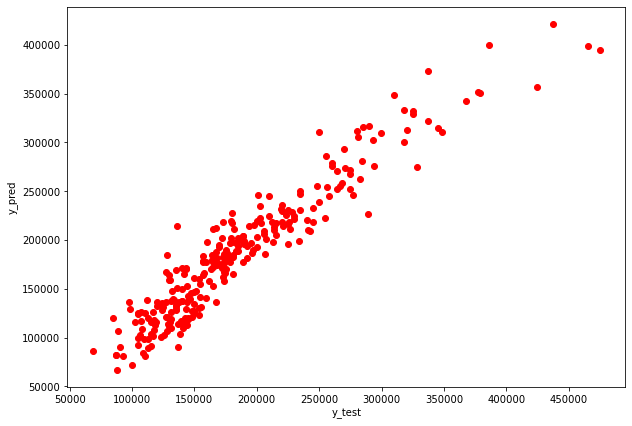

In [116]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred,c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')